In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tqdm import tqdm_notebook

# Generate linearly separable data

In [2]:
data, labels = make_blobs(n_samples=1000, n_features=2, random_state=0, centers=2)
print(data.shape, labels.shape)

(1000, 2) (1000,)


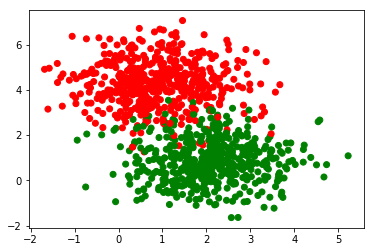

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

# Train Test Split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


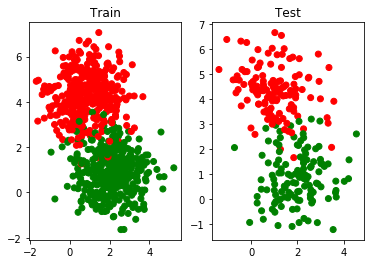

In [5]:
#subplot both train and test data
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_train[:,0],X_train[:,1], c=Y_train, cmap=my_cmap)
ax1.set_title('Train')
ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=my_cmap)
ax2.set_title('Test')
plt.show()

#Standardize the data

In [6]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
print(np.std(X_train_scaled))

1.0


# Sigmoid Neuron Class

In [0]:
class SigmoidNeuron():
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, x):
    return(np.dot(self.w, x) + self.b)
  
  def sigmoid(self, x):
    return(1.0 / (1.0 + np.exp(-x)))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y) * y_pred * (1-y_pred) * x)
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y) * y_pred * (1-y_pred))
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y)*x)
  
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return(y_pred - y)
  
  def fit(self, X, Y, epochs=100, lr=1e-2, initialize=True, display_loss=True, loss_fn='mse'):
    if(initialize):
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    min_loss = 100
    if(display_loss):
      loss = {}
    
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      dw, db = 0, 0
      for x,y in zip(X,Y):
        if(loss_fn=='ce'):
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
        
        elif(loss_fn=='mse'):
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y)
        
      Y_pred = self.predict(X)
      m = X.shape[0]
      
      self.w -= lr * (dw/m)
      self.b -= lr * (db/m)
      
      if(loss_fn == 'mse'):
        loss[epoch] = mean_squared_error(Y, Y_pred)
        
      if(loss_fn=='ce'):
        loss[epoch] = log_loss(Y, Y_pred)
      
      if(loss[epoch] < min_loss):
        min_loss = loss[epoch]
        chkpt_w = self.w
        chkpt_b = self.b
    
    if(display_loss):
      plt.plot(loss.values())
    
    self.w = chkpt_w
    self.b = chkpt_b
    print('Min loss: %0.3f'%(min_loss))
    #print('Accuracy score: %0.3f'%(accuracy_score(Y, self.predict(X))))
    return(self.w, self.b)
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.sigmoid(self.perceptron(x)))
    return(np.array(Y_pred))

In [0]:
sn = SigmoidNeuron()


Min loss: 0.076


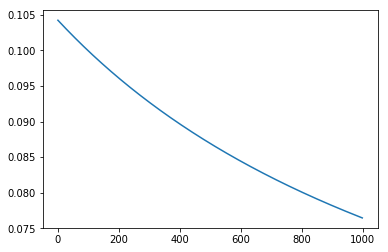

In [27]:
best_w, best_b = sn.fit(X_train_scaled, Y_train, epochs=1000)

#Evaluation

In [0]:
def evaluate(X_train_scaled, X_test_scaled, Y_train, Y_test):
  Y_train_pred = sn.predict(X_train_scaled)
  Y_train_pred_binarized = np.array(Y_train_pred > 0.5).astype('int').ravel()
  Y_test_pred = sn.predict(X_test_scaled)
  Y_test_pred_binarized = np.array(Y_test_pred > 0.5).astype('int').ravel()
  print('Accuracy score train: %0.3f' %(accuracy_score(Y_train, Y_train_pred_binarized)))
  print('Accuracy score test: %0.3f' %(accuracy_score(Y_test, Y_test_pred_binarized)))
  return(Y_test_pred_binarized)

In [29]:
Y_test_pred_binarized = evaluate(X_train_scaled, X_test_scaled, Y_train, Y_test)

Accuracy score train: 0.953
Accuracy score train: 0.936


# Visualize what model learnt

Text(0.5, 1.0, 'Test data predictions')

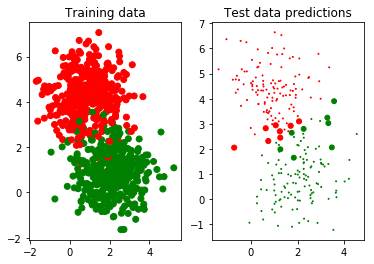

In [31]:
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap)
ax1.set_title('Training data')

ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c=Y_test_pred_binarized, cmap=my_cmap, s=np.abs(25*(Y_test - Y_test_pred_binarized)+1))
ax2.set_title('Test data predictions')

# Generate non-linear data

In [34]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


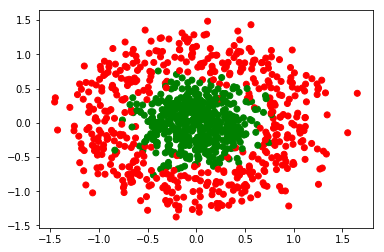

In [35]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model non-linearity


Min loss: 0.266


(array([[0.38941137, 0.34996168]]), array([0.06314406]))

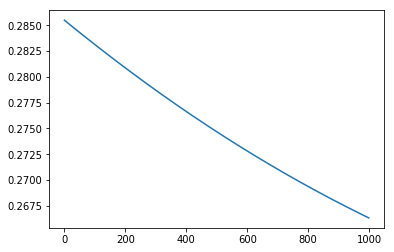

In [37]:
sn = SigmoidNeuron()
sn.fit(X_train_scaled, Y_train, epochs=1000)

#Evaluate non-linear model

In [43]:
Y_test_pred_binarized = evaluate(X_train_scaled, X_test_scaled, Y_train, Y_test)

Accuracy score train: 0.527
Accuracy score train: 0.572


Text(0.5, 1.0, 'Test data predictions')

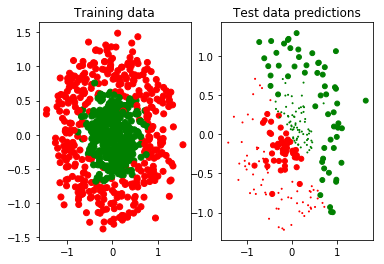

In [44]:
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap)
ax1.set_title('Training data')

ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c=Y_test_pred_binarized, cmap=my_cmap, s=np.abs(25*(Y_test - Y_test_pred_binarized)+1))
ax2.set_title('Test data predictions')